In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [58]:
#read the online data set
data = pd.read_csv("./superstoredata.csv")
print(data)

           Ship Mode Customer ID     Customer Name    Segment        Country  \
0       Second Class    CG-12520       Claire Gute   Consumer  United States   
1       Second Class    CG-12520       Claire Gute   Consumer  United States   
2       Second Class    DV-13045   Darrin Van Huff  Corporate  United States   
3     Standard Class    SO-20335    Sean O'Donnell   Consumer  United States   
4     Standard Class    SO-20335    Sean O'Donnell   Consumer  United States   
...              ...         ...               ...        ...            ...   
9989    Second Class    TB-21400  Tom Boeckenhauer   Consumer  United States   
9990  Standard Class    DB-13060       Dave Brooks   Consumer  United States   
9991  Standard Class    DB-13060       Dave Brooks   Consumer  United States   
9992  Standard Class    DB-13060       Dave Brooks   Consumer  United States   
9993    Second Class    CC-12220      Chris Cortes   Consumer  United States   

                 City       State  Post

In [59]:
#drop customer id because it is of no use
data.drop('Customer ID',axis = 1, inplace = True)
print(data)

           Ship Mode     Customer Name    Segment        Country  \
0       Second Class       Claire Gute   Consumer  United States   
1       Second Class       Claire Gute   Consumer  United States   
2       Second Class   Darrin Van Huff  Corporate  United States   
3     Standard Class    Sean O'Donnell   Consumer  United States   
4     Standard Class    Sean O'Donnell   Consumer  United States   
...              ...               ...        ...            ...   
9989    Second Class  Tom Boeckenhauer   Consumer  United States   
9990  Standard Class       Dave Brooks   Consumer  United States   
9991  Standard Class       Dave Brooks   Consumer  United States   
9992  Standard Class       Dave Brooks   Consumer  United States   
9993    Second Class      Chris Cortes   Consumer  United States   

                 City       State  Postal Code Region       Product ID  \
0           Henderson    Kentucky        42420  South  FUR-BO-10001798   
1           Henderson    Kentucky  

In [61]:
#print head of data frame
data.head(10)

,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,Standard Class,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,Standard Class,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
7,Standard Class,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
8,Standard Class,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825
9,Standard Class,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700


In [62]:
#checking for missing values
data.isnull().sum()

Ship Mode        0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

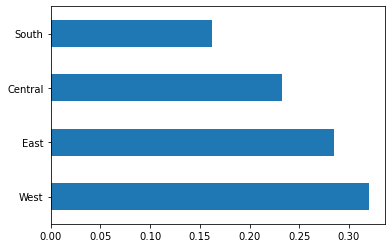

In [63]:
#handling outliers
#let's calculate the percentage of each region category
data.Region.value_counts(normalize= True)
#let's plot the bargraph
data.Region.value_counts( normalize= True).plot.barh()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

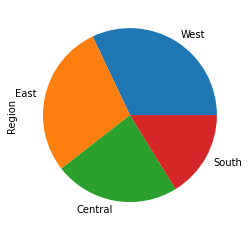

In [65]:
#calculating percentage of each region
data.Region.value_counts(normalize= True)
#let's plot the piechart of region category
data.Region.value_counts(normalize= True).plot.pie()
plt.show

In [66]:
#let's describe the sales(numerical method)
data.Sales.describe()

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

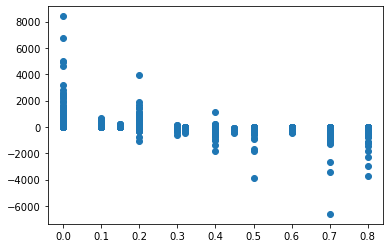

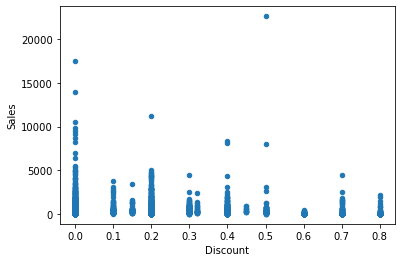

In [67]:
#bivariate outliers-let's plot the scatterplot of discount and profit variables
plt.scatter(data.Discount, data.Profit)
plt.show
#let's plot the scatterplot of discount and sales variables in data
data.plot.scatter(x="Discount", y="Sales")
plt.show

In [68]:
#let's group it by the region and summing all the values based on the group
results= data.groupby("Region").sum()
results

,Postal Code,Sales,Quantity,Discount,Profit
Region,,,,,
Central,151786150,501239.8908,8780,558.34,39706.3625
East,50171698,678781.2400,10618,414.00,91522.7800
South,55875052,391721.9050,6209,238.55,46749.4303
West,293739752,725457.8245,12266,350.20,108418.4489


<function matplotlib.pyplot.show(close=None, block=None)>

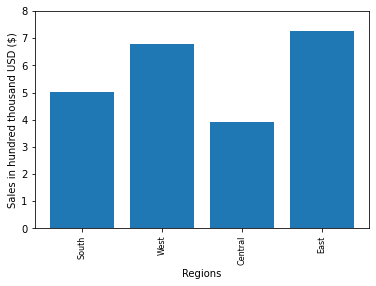

In [43]:
#let's calculate the region with the highest number of sales
Regions= data['Region'].unique()
plt.bar(Regions,results["Sales"])
plt.xticks(Regions, rotation= "vertical", size= 8)
Labels, location= plt.yticks()
plt.yticks(Labels, (Labels/100000).astype(int))#scaling in 100000dollars
plt.ylabel("Sales in hundred thousand USD ($)")
plt.xlabel("Regions")
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

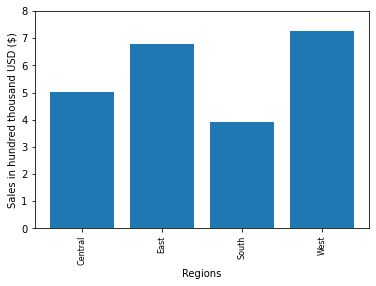

In [69]:
#Fixing the code
#Fixing the regions order issue
Regions= [region for region, df in data.groupby('Region')]
plt.bar(Regions,results["Sales"])
plt.xticks(Regions, rotation= "vertical", size= 8)
Labels, location= plt.yticks()
plt.yticks(Labels, (Labels/100000).astype(int))#scaling in 100000dollars
plt.ylabel("Sales in hundred thousand USD ($)")
plt.xlabel("Regions")
plt.show

In [70]:
#ggrouping the quantity ordered to know the most ordered product
product_grouping= data.groupby("Sub-Category")
product_grouping.sum()

,Postal Code,Sales,Quantity,Discount,Profit
Sub-Category,,,,,
Accessories,44468434,167380.3180,2976,60.80,41936.6357
Appliances,25250538,107532.1610,1729,77.60,18138.0054
Art,43329658,27118.7920,3000,59.60,6527.7870
Binders,83626398,203412.7330,5974,567.00,30221.7633
Bookcases,12771539,114879.9963,868,48.14,-3472.5560
Chairs,34936229,328449.1030,2356,105.00,26590.1663
Copiers,3873477,149528.0300,234,11.00,55617.8249
Envelopes,13325731,16476.4020,906,20.40,6964.1767
Fasteners,12506063,3024.2800,914,17.80,949.5182


<function matplotlib.pyplot.show(close=None, block=None)>

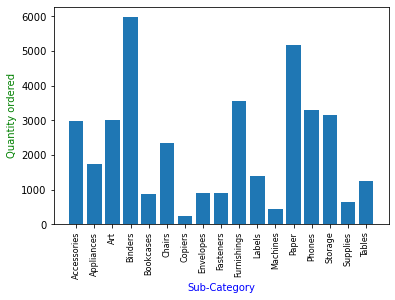

In [76]:
#visualizing the data
product_grouping= data.groupby("Sub-Category")

quantity_ordered = product_grouping.sum()["Quantity"]
Sub_Categories= [sub_category for sub_category, df in product_grouping]
plt.bar(Sub_Categories, quantity_ordered)
plt.ylabel("Quantity ordered", color='g')
plt.xlabel("Sub-Category", color="b")
plt.xticks(Sub_Categories, rotation= "vertical", size= 8)
plt.show

In [72]:
discounts = data.groupby("Sub-Category").mean()["Discount"]
print(discounts)

Sub-Category
Accessories    0.078452
Appliances     0.166524
Art            0.074874
Binders        0.372292
Bookcases      0.211140
Chairs         0.170178
Copiers        0.161765
Envelopes      0.080315
Fasteners      0.082028
Furnishings    0.138349
Labels         0.068681
Machines       0.306087
Paper          0.074891
Phones         0.154556
Storage        0.074704
Supplies       0.076842
Tables         0.261285
Name: Discount, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

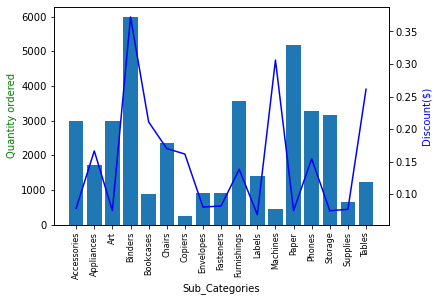

In [78]:
fig,ax1 = plt.subplots()
ax2=ax1.twinx()
ax1.bar(Sub_Categories, quantity_ordered)
ax2.plot(Sub_Categories,discounts, 'b-')
ax1.set_xlabel("Sub_Categories")
ax1.set_ylabel('Quantity ordered', color="g")
ax2.set_ylabel("Discount($)", color='b')
ax1.set_xticklabels(Sub_Categories, rotation="vertical",size=8)
plt.show